In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# ----------------------------
# Load data
# ----------------------------
data = np.load('../data/clustering/data.npy')
print(f"Data shape: {data.shape}")
X = data[:, :-1]  # Features
y_true = data[:, -1]  # True labels (if available)

# Scale the data (important pour les métriques différentes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Data shape: (1200, 4)


**Heuristique 1: Elbow**

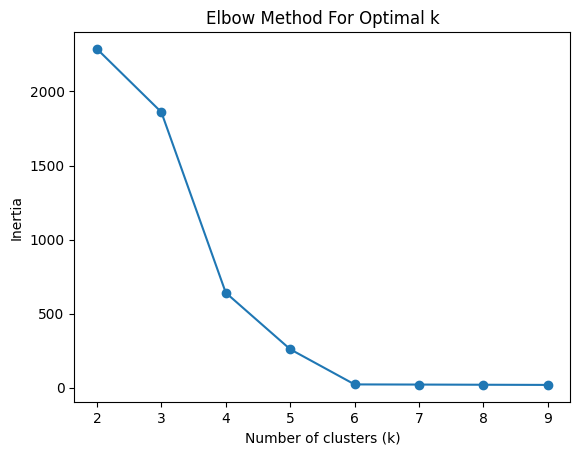

Optimal k by Elbow Method: 6


In [3]:
K_range = range(2, 10)
inertia_scores = [KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_ for k in K_range]

plt.plot(K_range, inertia_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# After visual inspection of the elbow plot
k_elbow = 6
print(f"Optimal k by Elbow Method: {k_elbow}")


**Heuristique 2: Silhouette**

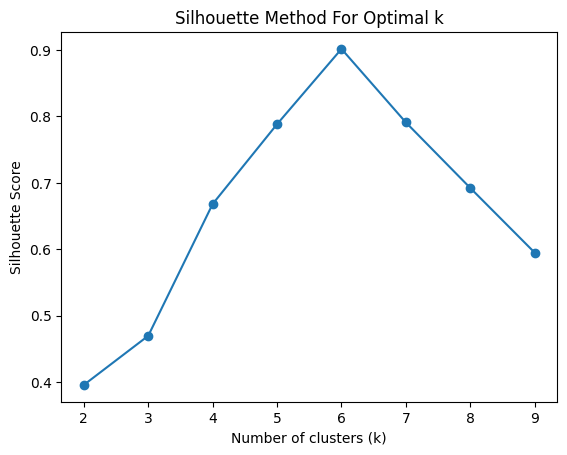

Optimal k by Silhouette Method: 6


In [4]:
sil_scores = [silhouette_score(X_scaled, KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)) for k in K_range]
k_sil = K_range[sil_scores.index(max(sil_scores))]

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

print(f"Optimal k by Silhouette Method: {k_sil}")

**Learning of the Methode and parameters**

In [5]:
methods = [
    ("KMeans", k_sil, "euclidean"),
    ("KMeans", k_elbow, "manhattan"),
    ("Agglomerative", k_elbow, "manhattan"),
    ("Agglomerative", k_sil, "euclidean"),
]

results = []

for method, k, metric in methods:
    if method == "KMeans":
        labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)
    else:  # Agglomerative
        labels = AgglomerativeClustering(n_clusters=k, metric=metric, linkage='average' if metric=="manhattan" else 'ward').fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels, metric=metric)
    results.append((method, metric, k, score, labels))

df_results = pd.DataFrame(results, columns=["Method", "Metric", "n_clusters", "Silhouette", "Labels"])

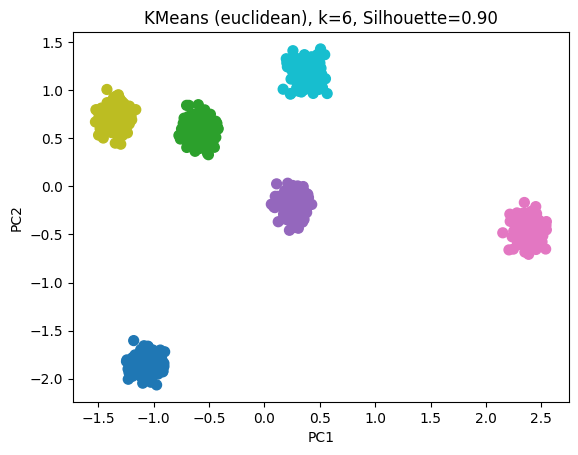

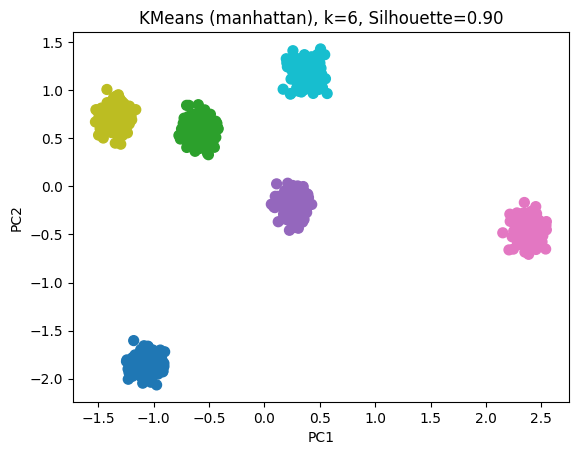

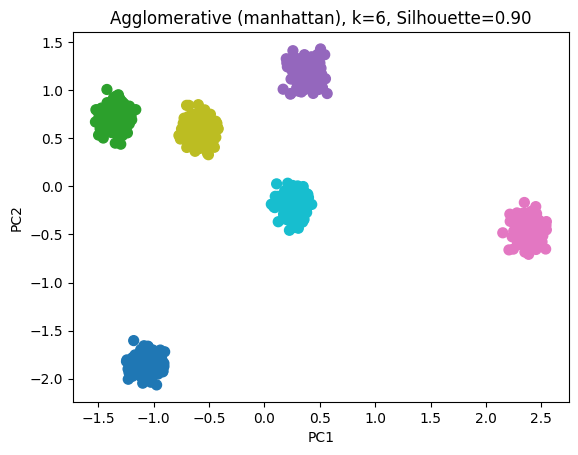

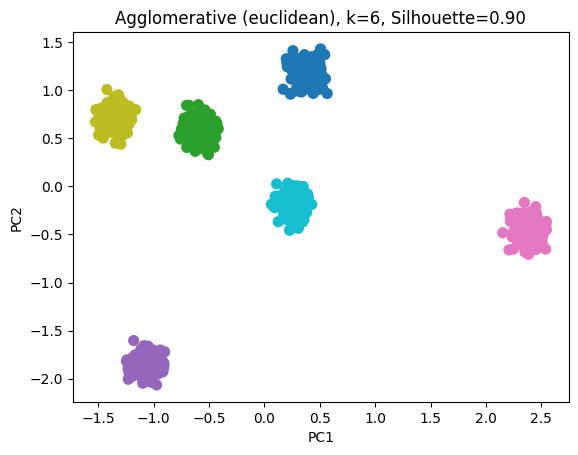

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

for method, metric, k, score, labels in results:
    plt.figure()
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=50)
    plt.title(f"{method} ({metric}), k={k}, Silhouette={score:.2f}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

In [7]:
import numpy as np
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 200, 1: 200, 2: 200, 3: 200, 4: 200, 5: 200}
